In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from matplotlib.colors import LogNorm

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

In [5]:
from matplotlib import cm

In [6]:
pd.set_option('display.max_columns', 500)

In [99]:
fastn = pd.read_pickle('data/fastn_20runs.pkl')

In [83]:
fastnsingles = pd.read_pickle('data/fastn_reproc.pkl')

In [93]:
fastnsingles[fastnsingles['code']!=4].shape

(118, 77)

In [125]:
ibdsingles =  pd.read_pickle('data/ibd_reproc.pkl')
ibds = pd.read_pickle('data/ibd_25runs.pkl')
#The 25 runs one is the hartlepool reactor ONLY sample 

In [126]:
def clean_data(df):
    df_cleaned = df[df['azimuth_ks']>=0.]
    print('Initial events: %i\nAfter removing non-triggers: %i'%(len(df), len(df_cleaned)))
    return df_cleaned

In [127]:
ibds = clean_data(ibds)
fastn = clean_data(fastn)

Initial events: 22267
After removing non-triggers: 22264
Initial events: 1599
After removing non-triggers: 1599


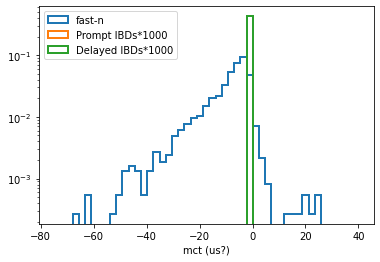

In [207]:
bins = plt.hist(fastn['t'], bins=np.linspace(-75,40,50), 
                histtype='step', density=True, 
                linewidth=2, label='fast-n'
               )
plt.hist(s1['t']*1000, bins=bins[1], 
         histtype='step', density=True, 
        linewidth=2, label='Prompt IBDs*1000')
plt.hist(s2['t']*1000, bins=bins[1], 
         histtype='step', density=True, 
        linewidth=2, label='Delayed IBDs*1000'
        )

plt.legend(loc='upper left')
# plt.xscale('log')
plt.xlabel('mct (us?)')
plt.yscale('log')
plt.show()

In [212]:
np.unique(s1['mct'])

array([0.])

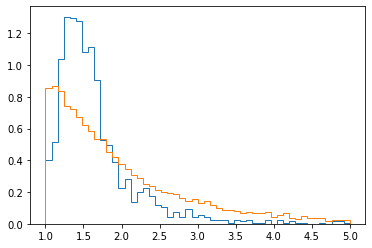

In [226]:
plt.hist(fastn['pe']/fastn['n9'], bins=np.linspace(1,5,51), histtype='step', density=True)
plt.hist(ibds['pe']/ibds['n9'], bins=np.linspace(1,5,51), histtype='step', density=True)

plt.show()

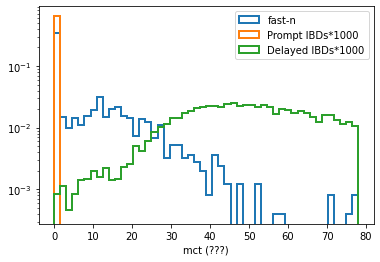

In [213]:
bins = plt.hist(fastn['mct'], bins=50, 
                histtype='step', density=True, 
                linewidth=2, label='fast-n'
               )
plt.hist(s1['mct']*1000, bins=bins[1], 
         histtype='step', density=True, 
        linewidth=2, label='Prompt IBDs*1000')
plt.hist(s2['mct']*1000, bins=bins[1], 
         histtype='step', density=True, 
        linewidth=2, label='Delayed IBDs*1000'
        )

plt.legend()
plt.xlabel('mct (???)')
plt.yscale('log')
plt.show()

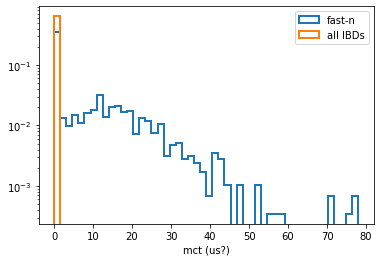

In [104]:
bins = plt.hist(fastn['mct'], bins=50, 
                histtype='step', density=True, 
                linewidth=2, label='fast-n'
               )
plt.hist(ibds['mct'], bins=bins[1], 
         histtype='step', density=True, 
        linewidth=2, label='all IBDs'
        )
plt.legend()
plt.xlabel('mct (us?)')
plt.yscale('log')
plt.show()

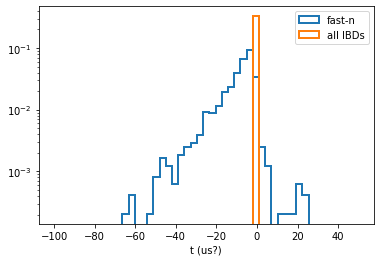

In [108]:
bins = plt.hist(fastn['t'], bins=np.linspace(-100,50,50), 
                histtype='step', density=True, 
                linewidth=2, label='fast-n'
               )
plt.hist(ibds['t'], bins=bins[1], 
         histtype='step', density=True, 
        linewidth=2, label='all IBDs'
        )
plt.legend()
plt.xlabel('t (us?)')
plt.yscale('log')
plt.show()

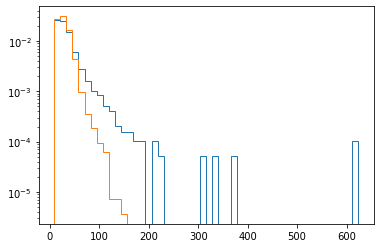

In [65]:
bins = plt.hist(fastn['n100'], bins=50, histtype='step', density=True)
plt.hist(ibds['n100'], bins=bins[1], histtype='step', density=True)
plt.yscale('log')
plt.show()

In [32]:
ibds.head()

,gtid,mcid,code,muon_flag,subid,inner_hit_prev,inner_hit,inner_hit_next,id_plus_dr_hit,veto_hit,veto_plus_dr_hit,veto_hit_prev,pe,innerPE,vetoPE,n9_prev,n9,n9_next,nOff,n100_prev,n100,n100_next,n400_prev,n400,n400_next,nX_prev,nX,nX_next,good_pos_prev,good_pos,good_pos_next,good_dir_prev,good_dir,good_dir_next,x,y,z,t,u,v,w,azimuth_ks_prev,azimuth_ks,azimuth_ks_next,distpmt,mc_energy,mcx,mcy,mcz,mct,mcu,mcv,mcw,closestPMT_prev,closestPMT,closestPMT_next,dxPrevx,dyPrevy,dzPrevz,drPrevr,dxNextx,dyNexty,dzNextz,drNextr,dxmcx,dymcy,dzmcz,drmcr,dt_sub,dt_prev_us,dt_next_us,timestamp,num_tested,best_like,worst_like,average_like,average_like_05m
0,1,1,1,0,0,0,0,0,33,0,0,0,28.643238,28.643238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,9050.116515,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+09,1.000000e+09,1.000000e+09,1.732051e+09,-1.000000e+09,-1.000000e+09,-1.000000e+09,1.732051e+09,-395.748994,6.868308,-72.775946,402.443509,30669.353516,0.000000e+00,0.000000e+00,1.043854e+07,267,-12.118702,-101.441635,-46.295841,-47.920692
1,2,4,1,0,0,0,0,27,26,0,0,0,11.518414,11.518414,0.0,0.0,0.0,22.0,2.0,0.0,0.0,27.0,0.0,0.0,29.0,0.0,0.0,22.0,0.000000,0.000000,0.824816,0.000000,0.000000,0.417917,-1.000000e+09,-1.000000e+09,-1.000000e+09,0.0,-1.000000e+09,-1.000000e+09,-1.000000e+09,0.000000,0.000000,0.382058,10704.511290,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2197.086302,-1.000000e+09,-1.000000e+09,-1.000000e+09,1.732051e+09,9.999976e+08,9.999975e+08,1.000000e+09,1.732048e+09,-29.584221,5.999814,119.218634,122.980920,12.686301,0.000000e+00,1.043854e+07,2.043177e+08,77,-67.911621,-91.308907,-74.736893,-75.944878
2,3,4,1,0,1,0,27,10,33,0,0,0,21.179277,21.179278,0.0,0.0,22.0,10.0,1.0,0.0,27.0,11.0,0.0,29.0,14.0,0.0,22.0,10.0,0.000000,0.824816,0.685896,0.000000,0.417917,0.455647,-2.420872e+03,-2.531755e+03,-1.147952e+02,0.0,-6.117565e-01,-4.614478e-01,-6.425105e-01,0.000000,0.382058,0.261470,7932.900434,0.688682,-2025.123046,-2538.623221,-42.019243,0.00000,-0.703554,-0.496328,0.508596,0.000000,2197.086302,1616.882578,9.999976e+08,9.999975e+08,9.999999e+08,1.732048e+09,4.990080e+03,5.705242e+03,-9.999999e+08,9.999999e+08,-485.536574,-53.624416,-11.732700,488.629715,48042.566406,1.043854e+07,1.938792e+08,2.043178e+08,285,-59.794350,-113.082336,-81.694244,-82.635628
3,6,9,1,0,0,27,10,20,55,0,0,0,46.280582,46.280582,0.0,22.0,10.0,17.0,1.0,27.0,11.0,19.0,29.0,14.0,24.0,22.0,10.0,17.0,0.824816,0.685896,0.834590,0.417917,0.455647,0.228712,2.569208e+03,3.173487e+03,2.289789e+03,0.0,7.825194e-02,6.608872e-01,7.463945e-01,0.382058,0.261470,0.134619,10605.549283,1.435370,2598.791985,3167.487125,2170.569879,0.00000,0.033214,0.904516,0.425144,2197.086302,1616.882578,1936.434876,4.990080e+03,5.705242e+03,2.404584e+03,7.951899e+03,-4.542024e+02,-6.042175e+01,-2.404584e+03,2.447851e+03,45.607580,239.687036,-103.010193,264.841512,10.311348,1.938792e+08,4.800000e+01,5.539394e+08,223,-9.744964,-105.484306,-53.131596,-55.236088
4,7,9,1,0,1,10,20,41,42,0,0,0,32.413143,32.413144,0.0,10.0,17.0,37.0,0.0,11.0,19.0,42.0,14.0,24.0,48.0,10.0,17.0,37.0,0.685896,0.834590,0.830653,0.455647,0.228712,0.478829,2.115005e+03,3.113065e+03,2.162939e+03,0.0,8.683220e-01,-2.908584e-04,4.960009e-01,0.261470,0.134619,0.156145,7085.483784,1.435370,2600.541914,3166.689602,2174.671848,0.02743,0.033214,0.904516,0.425144,1616.882578,1936.434876,2025.344238,-4.542024e+02,-6.042175e+01,-1.268494e+02,4.754381e+02,-4.610905e+03,-1.140043e+03,1.268494e+02,4.751445e+03,10.728973,123.096859,119.309214,171.763314,48185.019531,4.800000e+01,3.496216e+08,5.539394e+08,239,-32.054295,-122.804184,-69.654877,-71.352997


### Clean out the non-constructed events

In [10]:
def clean_data(df):
    df_cleaned = df[df['azimuth_ks']>=0.]
    print('Initial events: %i\nAfter removing non-triggers: %i'%(len(df), len(df_cleaned)))
    return df_cleaned

In [11]:
fastn = clean_data(fastn)

Initial events: 1858
After removing non-triggers: 1599


## IBDs

In [13]:
def clean_data(df):
    df_cleaned = df[np.logical_and(df['azimuth_ks']>=0., df['azimuth_ks_prev']>=0.)]
    print('Initial events: %i\nAfter removing non-triggers: %i'%(len(df), len(df_cleaned)))
    return df_cleaned

In [14]:
ibds = clean_data(ibds)

Initial events: 22267
After removing non-triggers: 22261


In [72]:
real_ibds = ibds[ibds['code']==1]

In [94]:
real_fastn = fastnsingles[fastnsingles['code']!=4]

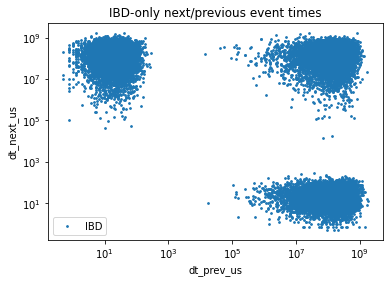

In [132]:
plt.scatter(ibds['dt_prev_us'], ibds['dt_next_us'], s=3, label='IBD')
# plt.scatter(real_fastn['drPrevr'], real_fastn['dt_prev_us'], s=3, label='tagged fast-n')
plt.legend()
plt.xlabel('dt_prev_us')
plt.ylabel('dt_next_us')
# plt.xlim(10, 2e4)
plt.title('IBD-only next/previous event times')
plt.loglog()
plt.show()

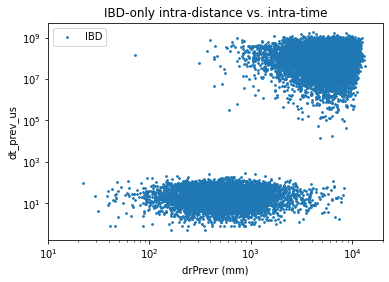

In [128]:
plt.scatter(ibds['drPrevr'], ibds['dt_prev_us'], s=3, label='IBD')
# plt.scatter(real_fastn['drPrevr'], real_fastn['dt_prev_us'], s=3, label='tagged fast-n')
plt.legend()
plt.xlabel('drPrevr (mm)')
plt.ylabel('dt_prev_us')
plt.xlim(10, 2e4)
plt.title('IBD-only intra-distance vs. intra-time')
plt.loglog()
plt.show()

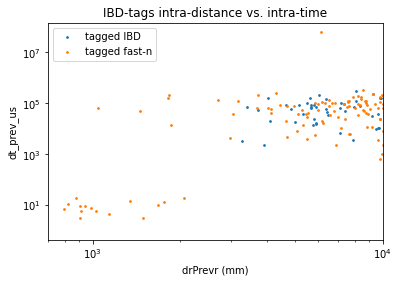

In [110]:
plt.scatter(real_ibds['drPrevr'], real_ibds['dt_prev_us'], s=3, label='tagged IBD')
plt.scatter(real_fastn['drPrevr'], real_fastn['dt_prev_us'], s=3, label='tagged fast-n')
plt.legend()
plt.xlabel('drPrevr (mm)')
plt.ylabel('dt_prev_us')
plt.xlim(700, 1e4)
plt.title('IBD-tags intra-distance vs. intra-time')
plt.loglog()
plt.show()

In [156]:
#prompt positron-likely
s1 = ibds[(ibds['dt_next_us'].between(1, 1000) & ibds['dt_prev_us'].between(1e4, 1e10))]
#delayed neutron-likely
s2 = ibds[(ibds['dt_prev_us'].between(1, 1000) & ibds['dt_next_us'].between(1e4, 1e10))]

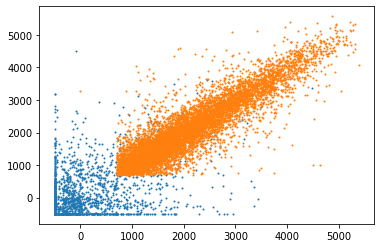

In [120]:
plt.scatter(fastn['closestPMT_prev'], fastn['closestPMT'], s=1)
plt.scatter(s2['closestPMT_prev'], s2['closestPMT'], s=1)

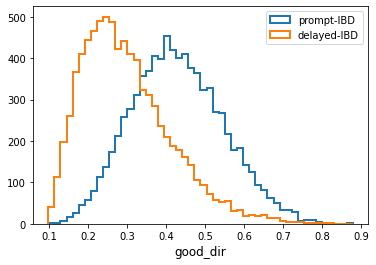

In [19]:
bins = plt.hist(s1['good_dir'], bins=50, 
         histtype='step', linewidth=2, 
        label='prompt-IBD')
plt.hist(s2['good_dir'], bins=bins[1], 
         histtype='step', linewidth=2, 
        label='delayed-IBD')
plt.legend()
plt.xlabel('good_dir', fontsize=12)
plt.show()

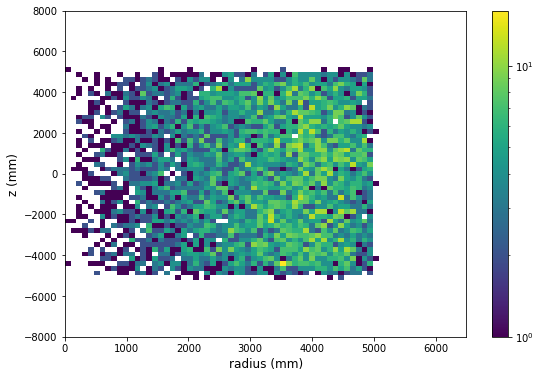

In [20]:
plt.figure(figsize=(9,6))
plt.hist2d(np.sqrt(s2['x']**2+s2['y']**2), 
            s2['z'], 
            cmin=0, norm=LogNorm(), 
            bins=[np.linspace(0,6500,70), np.linspace(-8000,8000,70)]
           )
plt.colorbar()

plt.ylabel('z (mm)', fontsize=12)
plt.xlabel('radius (mm)', fontsize=12)
plt.show()

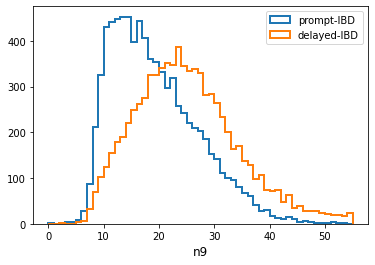

In [331]:
bins = plt.hist(s1['n9'], bins=np.linspace(0,55,56), 
         histtype='step', linewidth=2, 
        label='prompt-IBD')
plt.hist(s2['n9'], bins=bins[1], 
         histtype='step', linewidth=2, 
        label='delayed-IBD')
plt.legend()
plt.xlabel('n9', fontsize=12)
plt.show()

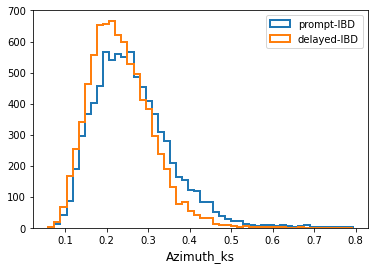

In [329]:
bins = plt.hist(s1['azimuth_ks'], bins=50, 
         histtype='step', linewidth=2, 
        label='prompt-IBD')
plt.hist(s2['azimuth_ks'], bins=bins[1], 
         histtype='step', linewidth=2, 
        label='delayed-IBD')
plt.legend()
plt.xlabel('Azimuth_ks', fontsize=12)
plt.show()

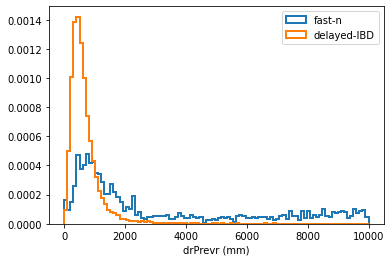

In [28]:
plt.hist(fastn['drPrevr'], 
         bins=np.linspace(0,1e4,100), 
         histtype='step', linewidth=2, density=True,
        label='fast-n')
plt.hist(s2['drPrevr'], 
         bins=np.linspace(0,1e4,100), 
         histtype='step', linewidth=2,  density=True,
        label='delayed-IBD')
plt.xlabel('drPrevr (mm)')
plt.legend()
# plt.xlim(0,1e6)
plt.show()

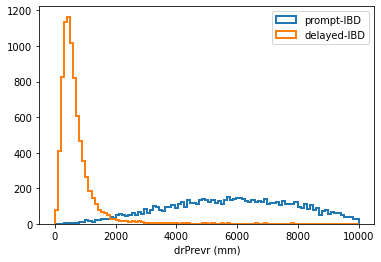

In [342]:
plt.hist(s1['drPrevr'], 
         bins=np.linspace(0,1e4,100), 
         histtype='step', linewidth=2, 
        label='prompt-IBD')
plt.hist(s2['drPrevr'], 
         bins=np.linspace(0,1e4,100), 
         histtype='step', linewidth=2, 
        label='delayed-IBD')
plt.xlabel('drPrevr (mm)')
plt.legend()
# plt.xlim(0,1e6)
plt.show()

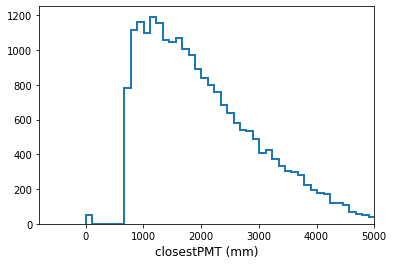

In [301]:
plt.hist(ibds['closestPMT'], bins=50, 
        histtype='step', linewidth=2)
plt.xlim(-800, 5000)
plt.xlabel('closestPMT (mm)', fontsize=12)
plt.show()

## Random Forest Classifier: fast-n vs. IBD-delayed

In [150]:
def calcr(data):
    data['r'] = np.sqrt(data['x']**2+data['y']**2)
    return data

In [161]:
s2 = calcr(s2)
fastn = calcr(fastn)

/Users/sophia/miniconda3/envs/ml/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [162]:
def get_dims(data, dimensions=dimensions):
    df_cut = data[dimensions]
    print('Remaining variables selected for analysis: %i'%(df_cut.shape[1]))
    return df_cut

In [177]:
dimensions = [
    'n9', 'n9_prev',
    'x', 'y', 'z',  'r', # 't',
    'inner_hit', 'inner_hit_prev', 
    'good_dir', 'good_dir_prev', 
    'good_pos', 'good_pos_prev', 
#     'distpmt', 
    'closestPMT', 'closestPMT_prev', #'closestPMT_next', 
    'drPrevr', 'dzPrevz',
    'dt_prev_us', 
    'azimuth_ks', 
    
]

In [178]:
ibd2 = get_dims(s2, dimensions=dimensions).iloc[0:len(fastn)]
fast = get_dims(fastn, dimensions=dimensions)

Remaining variables selected for analysis: 18
Remaining variables selected for analysis: 18


In [179]:
y = np.zeros(len(ibd2))
y = np.append(y, np.ones(len(fast)))

In [180]:
x = pd.concat([ibd2, fast])

In [181]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test

In [182]:
X_save = X_test

In [183]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [184]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=50, max_depth=8)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred=clf.predict(X_test)

In [185]:
# Model Accuracy, how often is the classifier correct?
print("Train Accuracy: %.2f%%"%(metrics.accuracy_score(y_train, y_train_pred)*100))
print("Test Accuracy: %.2f%%"%(metrics.accuracy_score(y_test, y_test_pred)*100))

Train Accuracy: 97.59%
Test Accuracy: 96.35%


In [186]:
feature_imp = pd.Series(clf.feature_importances_,index=dimensions).sort_values(ascending=False)

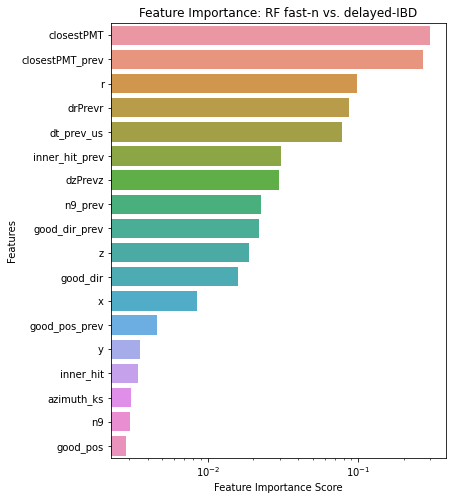

In [187]:
# Creating a bar plot
plt.figure(figsize=(6, 8))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.xscale('log')
plt.ylabel('Features')
plt.title("Feature Importance: RF fast-n vs. delayed-IBD")
# plt.legend()
plt.show()

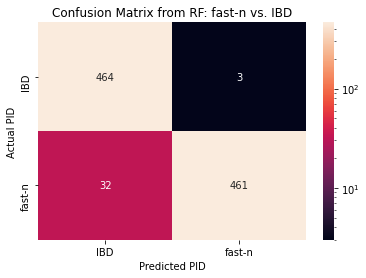

In [188]:
confmat = metrics.confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(confmat, annot=True, fmt='g', 
                 norm=LogNorm()
                )

ax.set_title('Confusion Matrix from RF: fast-n vs. IBD')
ax.set_xlabel('Predicted PID')
ax.set_ylabel('Actual PID')

ax.xaxis.set_ticklabels(['IBD', 'fast-n'])
ax.yaxis.set_ticklabels(['IBD', 'fast-n'])

plt.show()

In [521]:
wrong = X_save[y_test_pred!=y_test]

Below, yellow is a fast-n predicted as an IBD... bad 

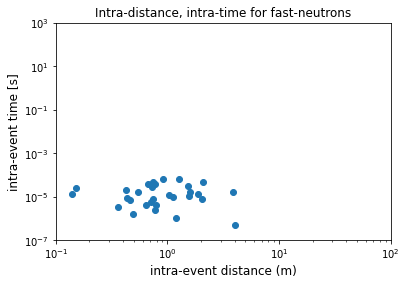

In [522]:
plt.scatter(wrong['drPrevr']/1e3, wrong['dt_prev_us']/1e6, 
#             c=wrong['sub_id']
          )
plt.xlim(1e-1,1e2)
plt.ylim(1e-7, 1e3)
# plt.colorbar(label='events/bin')
plt.xlabel('intra-event distance (m)', fontsize=12)
plt.ylabel('intra-event time [s]', fontsize=12)
plt.xscale('log')
plt.yscale('log')
# plt.grid()
plt.title('Intra-distance, intra-time for fast-neutrons')
plt.show()

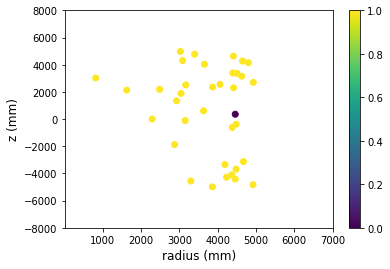

In [428]:
# plt.figure(figsize=(9,6))
plt.scatter(np.sqrt(wrong['x']**2+wrong['y']**2), 
            wrong['z'], 
            c=y_test[y_test!=y_test_pred], 
           )
plt.colorbar()
plt.xlim(1, 7000)
plt.ylim(-8000,8000)
plt.ylabel('z (mm)', fontsize=12)
plt.xlabel('radius (mm)', fontsize=12)
plt.show()

## Random Forest Classifier: fast-n vs. IBD-delayed again

In [486]:
dimensions = [
    'n9', 'n9_prev',
    'x', 'y', 'z', 
    'inner_hit', 'inner_hit_prev', 
    'good_dir', 'good_dir_prev', 
    'good_pos', 'good_pos_prev', 
#     'distpmt', 
    'closestPMT', 'closestPMT_prev', #'closestPMT_next', 
    'drPrevr', 'dzPrevz',
    'dt_prev_us', 
    'azimuth_ks', 
    
]

In [491]:
ibd2 = get_dims(s2, dimensions=dimensions).iloc[0:len(fastn)]
fast = get_dims(fastn, dimensions=dimensions)

Remaining variables selected for analysis: 17
Remaining variables selected for analysis: 17


In [492]:
y = np.zeros(len(ibd2))
y = np.append(y, np.ones(len(fast)))

In [493]:
x = pd.concat([ibd2, fast])

In [494]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test

In [495]:
X_save = X_test

In [496]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [516]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=50, max_depth=8)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred=clf.predict(X_test)

In [517]:
# Model Accuracy, how often is the classifier correct?
print("Train Accuracy: %.2f%%"%(metrics.accuracy_score(y_train, y_train_pred)*100))
print("Test Accuracy: %.2f%%"%(metrics.accuracy_score(y_test, y_test_pred)*100))

Train Accuracy: 97.63%
Test Accuracy: 96.88%


In [518]:
feature_imp = pd.Series(clf.feature_importances_,index=dimensions).sort_values(ascending=False)

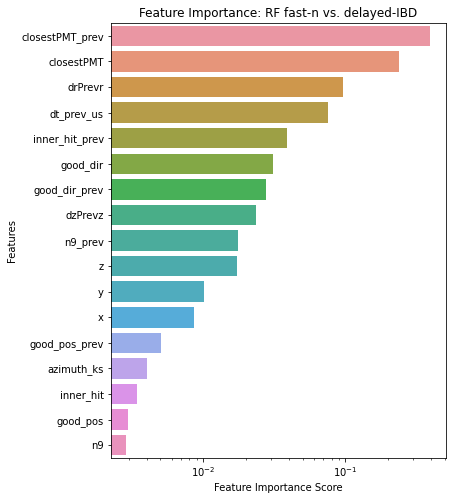

In [519]:
# Creating a bar plot
plt.figure(figsize=(6, 8))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.xscale('log')
plt.ylabel('Features')
plt.title("Feature Importance: RF fast-n vs. delayed-IBD")
# plt.legend()
plt.show()

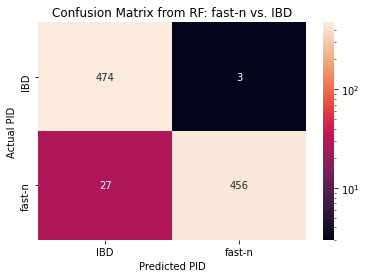

In [520]:
confmat = metrics.confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(confmat, annot=True, fmt='g', 
                 norm=LogNorm()
                )

ax.set_title('Confusion Matrix from RF: fast-n vs. IBD')
ax.set_xlabel('Predicted PID')
ax.set_ylabel('Actual PID')

ax.xaxis.set_ticklabels(['IBD', 'fast-n'])
ax.yaxis.set_ticklabels(['IBD', 'fast-n'])

plt.show()

In [521]:
wrong = X_save[y_test_pred!=y_test]

Below, yellow is a fast-n predicted as an IBD... bad 

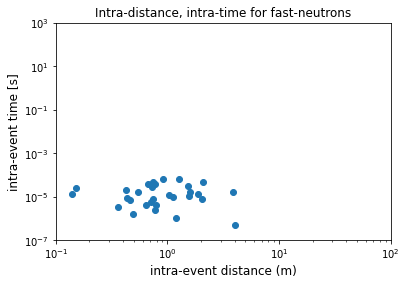

In [522]:
plt.scatter(wrong['drPrevr']/1e3, wrong['dt_prev_us']/1e6, 
#             c=wrong['sub_id']
          )
plt.xlim(1e-1,1e2)
plt.ylim(1e-7, 1e3)
# plt.colorbar(label='events/bin')
plt.xlabel('intra-event distance (m)', fontsize=12)
plt.ylabel('intra-event time [s]', fontsize=12)
plt.xscale('log')
plt.yscale('log')
# plt.grid()
plt.title('Intra-distance, intra-time for fast-neutrons')
plt.show()

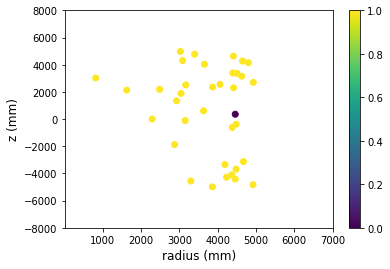

In [428]:
# plt.figure(figsize=(9,6))
plt.scatter(np.sqrt(wrong['x']**2+wrong['y']**2), 
            wrong['z'], 
            c=y_test[y_test!=y_test_pred], 
           )
plt.colorbar()
plt.xlim(1, 7000)
plt.ylim(-8000,8000)
plt.ylabel('z (mm)', fontsize=12)
plt.xlabel('radius (mm)', fontsize=12)
plt.show()